In [3]:
#installing packages 

import numpy as np
import pandas as pd
from pandas_datareader import data as web
import pandas_datareader
import datetime
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
%matplotlib inline


In [6]:
start = datetime.datetime(2018, 1, 2)
end = datetime.datetime(2019, 4, 1)

tickers = ['AAPL','WMT', 'TM','KO','BA']
stocks = pd.DataFrame()
for x in tickers:
    stocks[x] = web.DataReader(x, 'yahoo', start, end)['Close']

In [7]:
stocks_return = (stocks/stocks.shift(1))-1
stocks_return.tail()

,AAPL,WMT,TM,KO,BA
Date,,,,,
2019-03-27,0.008994,-0.011290,-0.006077,-0.000643,0.010341
2019-03-28,0.001326,-0.000823,-0.016194,-0.000644,0.000615
2019-03-29,0.006518,0.004118,-0.008818,0.006011,0.018641
2019-04-01,0.006791,0.002973,0.015760,-0.002988,0.026532
2019-04-02,0.014537,-0.008996,0.006423,-0.003211,-0.002018


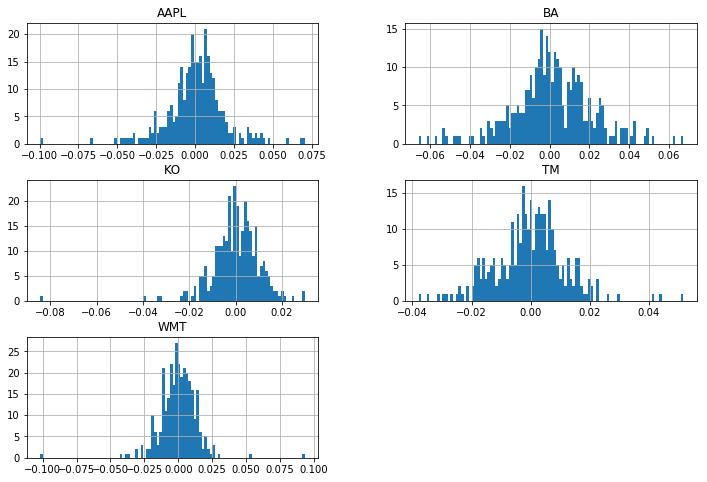

In [9]:
stocks_return.hist(bins=100,figsize=(12,8))
plt.tight_layout;

In [10]:
portfolio_weights = np.array(np.random.random(5))
portfolio_weights
portfolio_weights = portfolio_weights/np.sum(portfolio_weights)
portfolio_weights

array([ 0.1757193 ,  0.33591528,  0.03440764,  0.16816252,  0.28579526])

In [11]:
weighted_returns_portfolio = stocks_return.mul(portfolio_weights, axis = 1)

In [12]:
#Calculating the returns of the portfolio

stocks_return['Portfolio'] = weighted_returns_portfolio.sum(axis=1).dropna()

In [13]:
mu = stocks_return['Portfolio'].mean()
mu

0.00043622932462155506

In [14]:
sigma = stocks_return['Portfolio'].std()
sigma

0.011456805934133823

In [15]:
confidence = 0.99
confidence

0.99

In [16]:
alpha = norm.ppf(1-confidence)
alpha

-2.3263478740408408

In [17]:
position = 1e6
position

1000000.0

In [18]:
#maximum amount of loss with 99% of confidence level tomorrow

var = position*(mu-sigma*alpha)
var

27088.745452792264

In [19]:
days = 10

In [20]:
var_10_days = position *(mu*days-sigma*alpha*np.sqrt(days))
var_10_days

88644.949585607217

In [21]:
confidence = 0.95
confidence

0.95

In [22]:
alpha = norm.ppf(1-confidence)
alpha

-1.6448536269514722

In [23]:
var_10_days = position *(mu*days-sigma*alpha*np.sqrt(days))
var_10_days

63954.684614643818

In [26]:
days_2 = 5 

var_5_days = position *(mu*days_2-sigma*alpha*np.sqrt(days))
var_5_days

61773.537991536054